In [84]:
import binarybrain as bb
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [129]:
# read CIFAR-10
td = bb.load_cifar10()

# create marge image
def get_cifra10_img(td, i):
    return td['x_train'][i].reshape(3, 32, 32).transpose(1, 2, 0)

v_list = []
for i in range(8):
    h_list = []
    for j in range(8):
        h_list.append(get_cifra10_img(td, i*8+j))
    v_list.append(np.hstack(h_list))
img_cifar10 = np.vstack(v_list)

In [130]:
# read lena
img_lena = cv2.imread('lena.jpg')
img_lena = img_lena[:,:,::-1].astype(np.float32) / 255.0

In [131]:
def add_noize_image(img, bit_size):
    return img + ((np.random.rand(*img.shape) - 0.5) / (1 << (bit_size-1)))

def quontize_image(img, bit_size, add_noize=False):
    if add_noize:
        img = add_noize_image(img, bit_size)
    return np.clip(((img * 255).astype(np.int) >> (8 - bit_size)).astype(np.float32) / ((1 << bit_size) - 1), 0, 1)

In [141]:
def draw_image(img, name):
    plt.figure(figsize=(10, 25))
    for i in range(8):
        bit_size = 8-i
        
        img_q = quontize_image(img, bit_size, False)
        plt.subplot(8, 2, i*2+1)
        plt.title('quantize:%dbit' % bit_size)
        plt.imshow(img_q)
        cv2.imwrite('%s_%dbit_q.png' % (name, bit_size), img_q[:,:,::-1]*255)
        
        img_qn = quontize_image(img, bit_size, True)
        plt.subplot(8, 2, i*2+2)
        plt.title('quantize:%dbit + noise' % bit_size)
        plt.imshow(img_qn)
        cv2.imwrite('%s_%dbit_qn.png' % (name, bit_size), img_qn[:,:,::-1]*255)
    plt.tight_layout()
    plt.savefig(name + '_result.png')

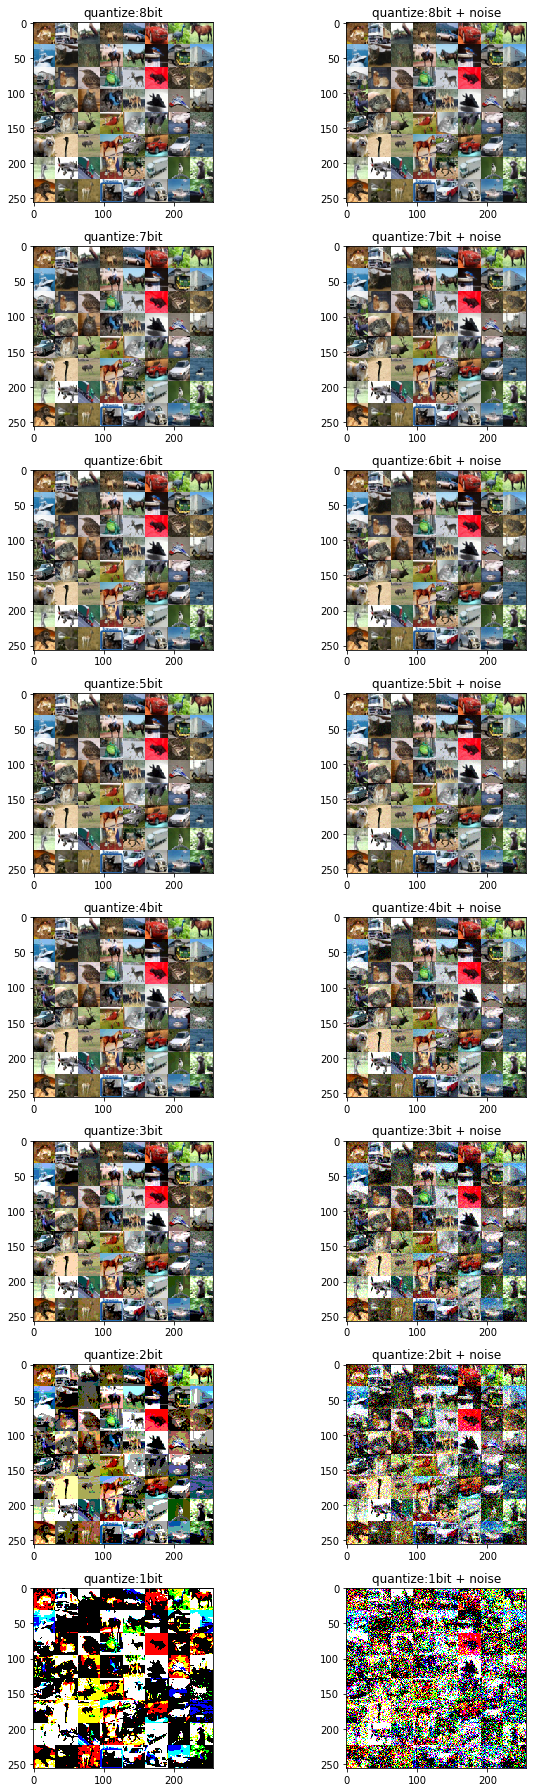

In [142]:
draw_image(img_cifar10, 'cifar10')

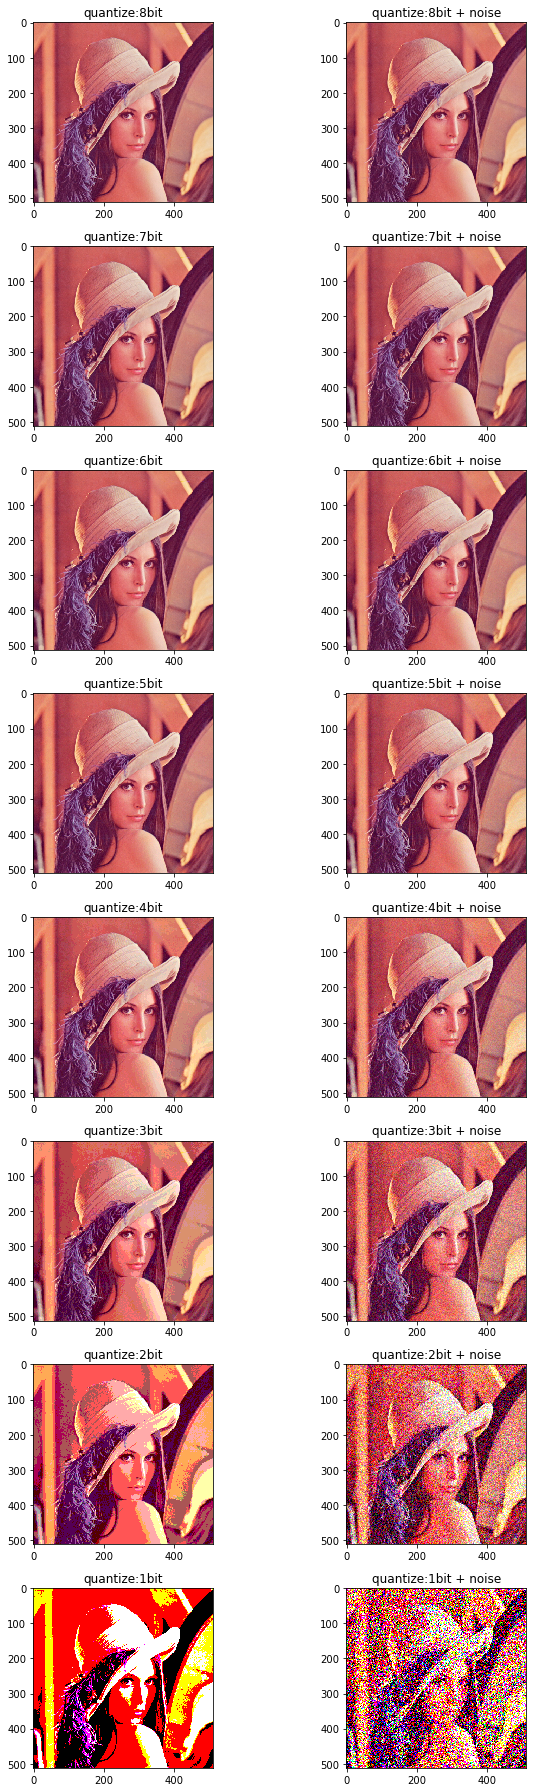

In [143]:
draw_image(img_lena, 'lena')